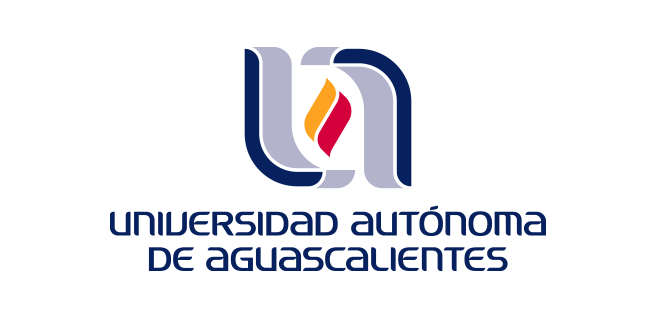
METAHEURISTICAS I


PROFESOR: FRANCISCO JAVIER LUNA ROSAS


ALUMNOS:

    GABRIEL MELCHOR CAMPOS
    
    ENRIQUE VELEZ DURAN
    
    CARLOS FERNANDO NAJERA RUIZ

In [35]:
import random
import math
import time

In [36]:
# Datos del problema
num_procesadores = 8

In [37]:
# Calcular el número mínimo de bits necesarios para representar el número de procesadores
num_bits_por_carga = math.ceil(math.log2(num_procesadores))

In [38]:
# Generar cargas aleatorias hasta que la suma total sea 3600
cargas = []
suma_cargas = 0
while suma_cargas < 3600:
    carga = random.randint(5,15)
    if suma_cargas + carga > 3600:
        carga = 3600 - suma_cargas
    cargas.append(carga)
    suma_cargas += carga
num_cargas = len(cargas)

In [39]:
# Función para calcular la distribución de cargas
def calcular_distribucion_de_cargas(asignacion):
    cargas_por_procesador = [0] * num_procesadores
    for i in range(num_cargas):
        carga = cargas[i]
        procesador = int(asignacion[i * num_bits_por_carga:(i + 1) * num_bits_por_carga], 2)
        if procesador < num_procesadores:  # Asegurarse de que el procesador esté dentro del rango válido
            cargas_por_procesador[procesador] += carga
    return cargas_por_procesador

In [40]:
# Función para generar una asignación aleatoria de cargas
def generar_asignacion_aleatoria():
    return ''.join([format(random.randint(0, num_procesadores - 1), '0' + str(num_bits_por_carga) + 'b') for _ in range(num_cargas)])


In [41]:
def fitness(asignacion):
    distribucion_de_cargas = calcular_distribucion_de_cargas(asignacion)
    maxspan = max(distribucion_de_cargas)  # Calcular maxspan
    if maxspan == 0:
        return 0.0
    utilizacion_promedio = sum(carga / maxspan for carga in distribucion_de_cargas) / num_cargas
    fitness = (1 / maxspan) * utilizacion_promedio
    return fitness

In [42]:
#ruleta
def seleccionar(asignaciones, fitnesses):
    total_fitness = sum(fitnesses)
    pesos = [fitness / total_fitness for fitness in fitnesses]
    return random.choices(asignaciones, weights=pesos, k=1)[0]


In [43]:
#cruzamiento de un punto
def cruzar(asignacion1, asignacion2):
    punto_de_cruce = random.randint(1, len(asignacion1) - 1)
    hijo1 = asignacion1[:punto_de_cruce] + asignacion2[punto_de_cruce:]
    hijo2 = asignacion2[:punto_de_cruce] + asignacion1[punto_de_cruce:]
    return hijo1, hijo2


In [44]:
def mutar(asignacion):
    indice = random.randint(0, len(asignacion) - 1)
    bit = asignacion[indice]
    bit_mutado = '1' if bit == '0' else '0'
    return asignacion[:indice] + bit_mutado + asignacion[indice + 1:]

In [45]:
# Generar una población inicial de asignaciones aleatorias
poblacion = [generar_asignacion_aleatoria() for _ in range(100)]


In [46]:
# Ejecutar el algoritmo genético
for generacion in range(100):
    tiempo_inicio = time.time()  # Registrar el tiempo de inicio de la generación
    # Calcular la aptitud de cada asignación en la población
    fitnesses = [fitness(asignacion) for asignacion in poblacion]

    # Seleccionar dos padres usando selección por ruleta
    padre1 = seleccionar(poblacion, fitnesses)
    padre2 = seleccionar(poblacion, fitnesses)

    # Cruzar los dos padres para generar dos hijos utilizando el cruzamiento por dos puntos
    hijo1, hijo2 = cruzar(padre1, padre2)

    # Mutar los hijos con una pequeña probabilidad utilizando permutación
    if random.random() < 0.05:
        hijo1 = mutar(hijo1)
    if random.random() < 0.05:
        hijo2 = mutar(hijo2)

    # Reemplazar dos asignaciones aleatorias en la población por los nuevos hijos
    poblacion[random.randint(0, len(poblacion) - 1)] = hijo1
    poblacion[random.randint(0, len(poblacion) - 1)] = hijo2

    # Encontrar la mejor asignación en la población actual
    mejor_asignacion = min(poblacion, key=fitness)

    # Calcular la distribución de cargas
    distribucion_de_cargas = calcular_distribucion_de_cargas(mejor_asignacion)

    # Mostrar la distribución de cargas
    print(f"\nGeneración {generacion + 1}:")
    for i, carga_por_procesador in enumerate(distribucion_de_cargas):
        print(f"Procesador {i} = {carga_por_procesador} total de cargas")

    carga_maxima = max(distribucion_de_cargas)
    carga_media = sum(distribucion_de_cargas) / num_procesadores
    print(f"Carga máxima de procesador = {carga_maxima}")
    print(f"Carga media = {carga_media}")

    tiempo_fin = time.time()  # Registrar el tiempo de finalización de la generación
    tiempo_generacion = tiempo_fin - tiempo_inicio
    print(f"Tiempo en {generacion + 1}: {tiempo_generacion}")


Generación 1:
Procesador 0 = 414 total de cargas
Procesador 1 = 482 total de cargas
Procesador 2 = 413 total de cargas
Procesador 3 = 647 total de cargas
Procesador 4 = 360 total de cargas
Procesador 5 = 374 total de cargas
Procesador 6 = 498 total de cargas
Procesador 7 = 412 total de cargas
Carga máxima de procesador = 647
Carga media = 450.0
Tiempo en 1: 0.06452107429504395

Generación 2:
Procesador 0 = 414 total de cargas
Procesador 1 = 482 total de cargas
Procesador 2 = 413 total de cargas
Procesador 3 = 647 total de cargas
Procesador 4 = 360 total de cargas
Procesador 5 = 374 total de cargas
Procesador 6 = 498 total de cargas
Procesador 7 = 412 total de cargas
Carga máxima de procesador = 647
Carga media = 450.0
Tiempo en 2: 0.055248260498046875

Generación 3:
Procesador 0 = 414 total de cargas
Procesador 1 = 482 total de cargas
Procesador 2 = 413 total de cargas
Procesador 3 = 647 total de cargas
Procesador 4 = 360 total de cargas
Procesador 5 = 374 total de cargas
Procesador 6


Generación 23:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesador 6 = 366 total de cargas
Procesador 7 = 462 total de cargas
Carga máxima de procesador = 673
Carga media = 450.0
Tiempo en 23: 0.06699395179748535

Generación 24:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesador 6 = 366 total de cargas
Procesador 7 = 462 total de cargas
Carga máxima de procesador = 673
Carga media = 450.0
Tiempo en 24: 0.05399966239929199

Generación 25:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesad


Generación 50:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesador 6 = 366 total de cargas
Procesador 7 = 462 total de cargas
Carga máxima de procesador = 673
Carga media = 450.0
Tiempo en 50: 0.04836916923522949

Generación 51:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesador 6 = 366 total de cargas
Procesador 7 = 462 total de cargas
Carga máxima de procesador = 673
Carga media = 450.0
Tiempo en 51: 0.049424171447753906

Generación 52:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesa


Generación 78:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesador 6 = 366 total de cargas
Procesador 7 = 462 total de cargas
Carga máxima de procesador = 673
Carga media = 450.0
Tiempo en 78: 0.05000495910644531

Generación 79:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesador 6 = 366 total de cargas
Procesador 7 = 462 total de cargas
Carga máxima de procesador = 673
Carga media = 450.0
Tiempo en 79: 0.04971814155578613

Generación 80:
Procesador 0 = 379 total de cargas
Procesador 1 = 469 total de cargas
Procesador 2 = 333 total de cargas
Procesador 3 = 484 total de cargas
Procesador 4 = 434 total de cargas
Procesador 5 = 673 total de cargas
Procesad

In [34]:
# Mostrar la mejor asignación
mejor_asignacion = mejor_asignacion.replace(" ", "") #Esto elimina los espacios
mejor_asignacion = " ".join([mejor_asignacion[i:i+3] for i in range(0, len(mejor_asignacion), 3)]) #los va dividiendo en 3 por la cantidad de bits
print(f"\nMejor asignación: {mejor_asignacion}")


Mejor asignación: 011 010 100 111 010 110 001 001 000 110 000 011 111 011 101 001 111 001 110 001 101 010 010 100 011 000 011 001 110 110 101 110 001 001 010 101 000 111 101 011 111 111 110 110 001 111 001 111 101 011 111 000 001 110 101 100 011 101 100 001 010 000 010 101 100 001 001 111 010 001 000 000 000 101 001 110 111 100 001 100 000 011 111 001 101 111 001 110 010 010 011 010 100 101 010 101 111 011 000 111 101 011 100 101 010 010 001 001 010 100 001 011 100 110 101 000 100 010 001 001 101 011 101 000 111 001 000 000 111 011 011 001 110 100 100 101 011 101 001 100 111 001 011 011 001 110 000 011 100 101 111 101 000 101 100 011 010 100 100 101 000 101 001 001 110 101 111 011 000 100 110 100 110 011 100 000 011 001 100 001 000 100 100 110 000 010 100 101 100 100 000 011 110 001 001 011 011 110 000 010 000 011 011 010 110 100 011 100 111 101 010 010 011 001 100 000 000 101 000 000 000 101 111 111 100 100 000 011 101 000 101 000 110 111 110 111 101 111 001 011 001 001 101 110 101 0